![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [58]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
print(penguins_df.head())
print(penguins_df.info())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3              36.7             19.3              193.0       3450.0  FEMALE
4              39.3             20.6              190.0       3650.0    MALE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB
None


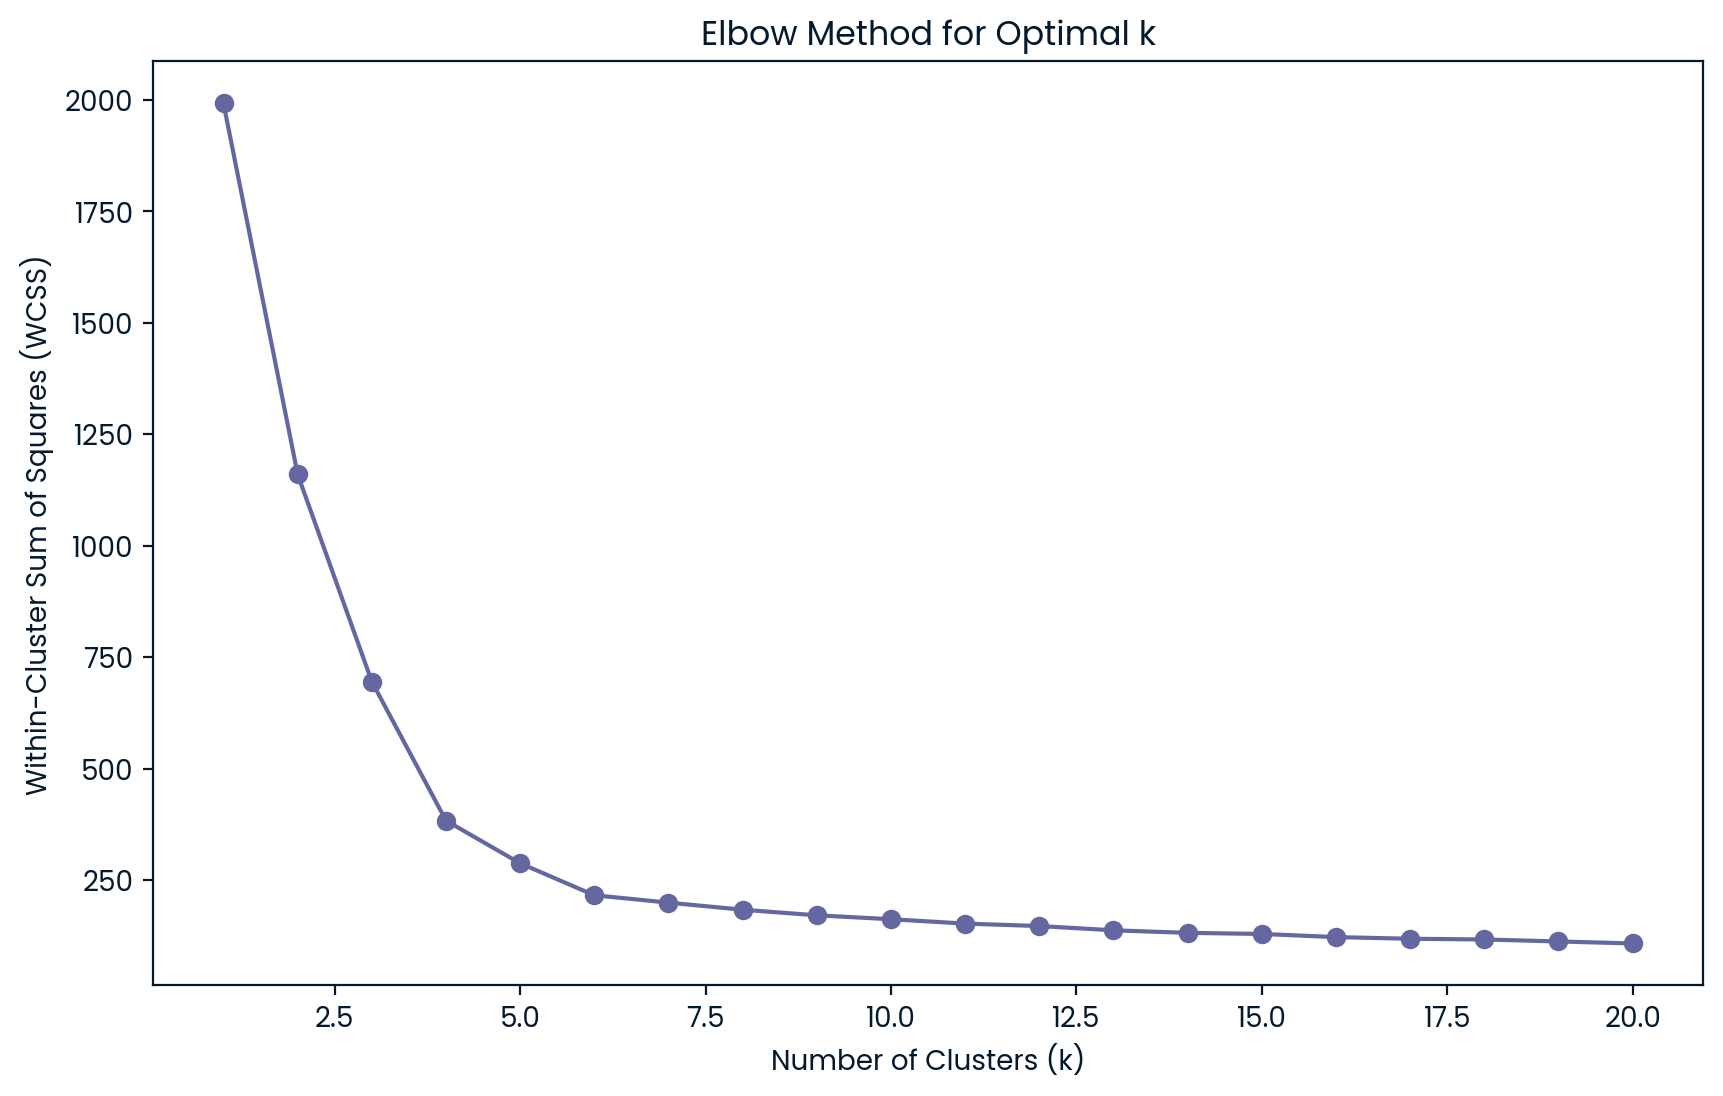

In [59]:
##iterate the sex column
penguins_df= pd.get_dummies(penguins_df)
## StandardScaler
SS = StandardScaler()
penguins_df_pre = SS.fit_transform(penguins_df)
## An elbow curve to find a perfect k
k = 20
wcss = []
for i in range(1,k+1) : 
    model= KMeans(n_clusters=i,random_state=42)
    model.fit(penguins_df_pre)
    wcss.append(model.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, k + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()



In [60]:
##After the plot we see after k = 6 the iteria drop slowly 
nmodel =KMeans(n_clusters=6,random_state=42)
nmodel.fit(penguins_df_pre)
penguins_df['label']= nmodel.labels_
penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,label
0,39.1,18.7,181.0,3750.0,0,1,4
1,39.5,17.4,186.0,3800.0,1,0,0
2,40.3,18.0,195.0,3250.0,1,0,0
3,36.7,19.3,193.0,3450.0,1,0,0
4,39.3,20.6,190.0,3650.0,0,1,4
...,...,...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,1,0,3
328,46.8,14.3,215.0,4850.0,1,0,3
329,50.4,15.7,222.0,5750.0,0,1,2
330,45.2,14.8,212.0,5200.0,1,0,3


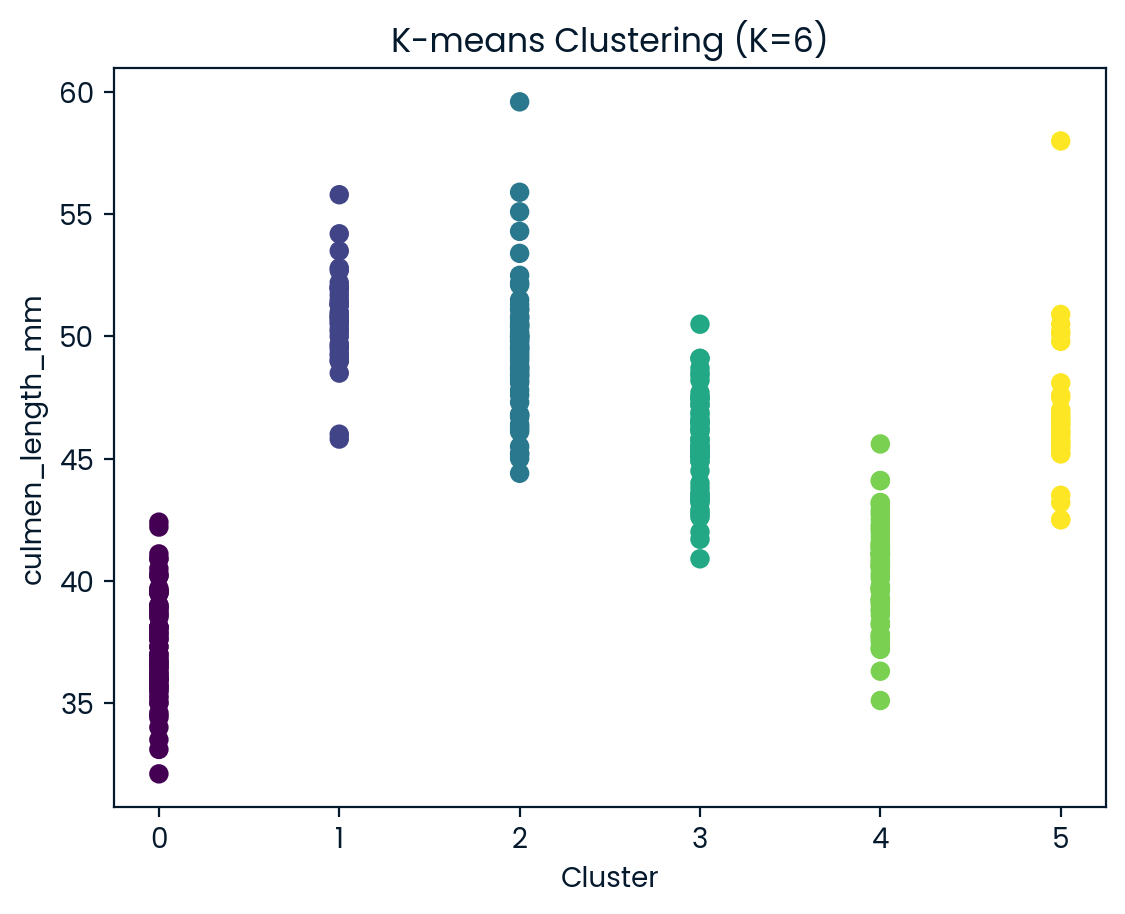

In [61]:
plt.scatter(penguins_df['label'], penguins_df['culmen_length_mm'], c=nmodel.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title(f'K-means Clustering (K={6})')
plt.show()

In [62]:
numeric_columns=['culmen_length_mm',
'culmen_depth_mm',
'flipper_length_mm',
'body_mass_g',
'label'
]
stat_penguins = penguins_df.groupby('label')[numeric_columns].mean()
print(stat_penguins)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  label
label                                                                          
0             37.374667        17.604000         187.693333  3369.666667    0.0
1             50.805556        19.305556         199.666667  3952.083333    1.0
2             49.473770        15.718033         221.540984  5484.836066    2.0
3             45.563793        14.237931         212.706897  4679.741379    3.0
4             40.315714        19.011429         192.242857  4034.642857    4.0
5             46.881250        17.628125         192.218750  3535.156250    5.0
